In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit
import scipy
from collections import deque

Q1, 2, 6

In [9]:
class Network(object):
    def __init__(self, num_nodes):
        self.adj = {i: set() for i in range(num_nodes)}

    def add_edge(self, i, j):
        self.adj[i].add(j)
        self.adj[j].add(i)

    def neighbors(self, i):
        return self.adj[i]

    def edge_list(self):
        return [(i, j) for i in self.adj for j in self.adj[i] if i < j]

class Naive_Bernoulli_Network(Network):
    def __init__(self, num_nodes, probability):
        super().__init__(num_nodes)

        for i in range(num_nodes):
            for j in range(i+1, num_nodes):
                if np.random.binomial(1, probability):   
                    self.add_edge(i, j)

# Assumed sparse network to be efficient
class Two_Step_Bernoulli_Network(Network):
    def __init__(self, num_nodes, probability):
        super().__init__(num_nodes)

        num_edges = math.comb(num_nodes, 2)
        m = np.random.binomial(num_edges, probability)

        for _ in range(m):
            i, j = np.random.randint(0, num_nodes), np.random.randint(0, num_nodes)
            while i == j or j in self.adj[i]:
                j = np.random.randint(0, num_nodes)
            self.add_edge(i, j)

Theoretical Mean: 495.0 Actual Mean: 493.702
Theoretical Variance: 445.5 Actual Variance: 434.329196


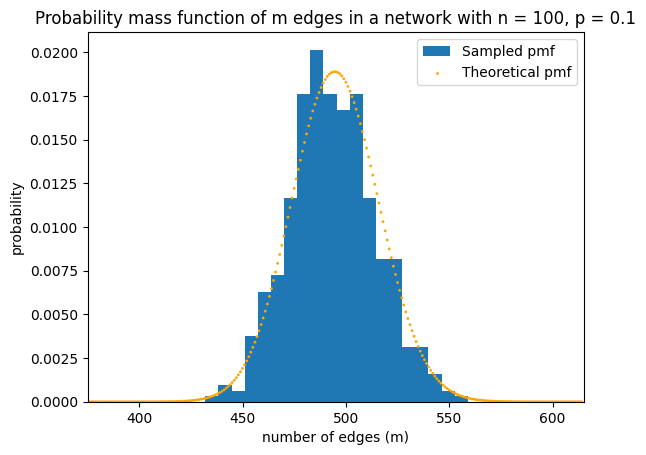

Theoretical Mean: 1485.0 Actual Mean: 1485.0
Theoretical Variance: 1039.5 Actual Variance: 1135.296


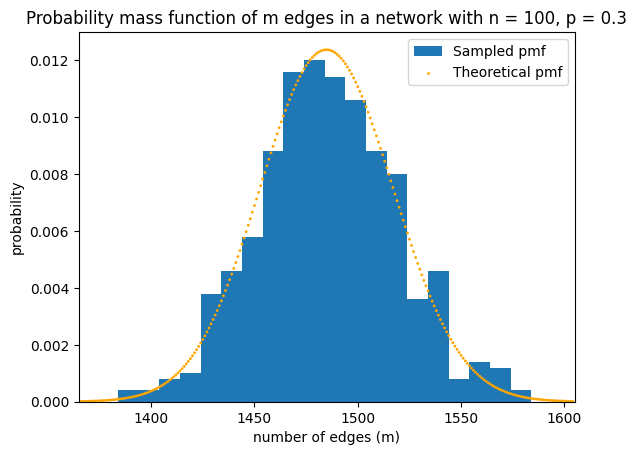

Theoretical Mean: 2475.0 Actual Mean: 2475.482
Theoretical Variance: 1237.5 Actual Variance: 1315.7696760000001


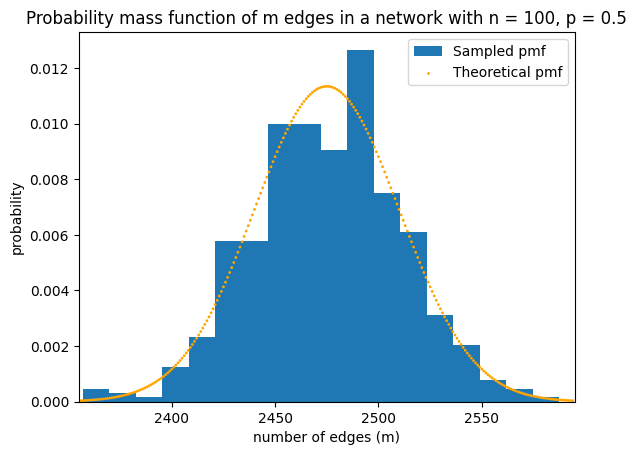

Theoretical Mean: 3465.0 Actual Mean: 3465.218
Theoretical Variance: 1039.5000000000002 Actual Variance: 1014.826476


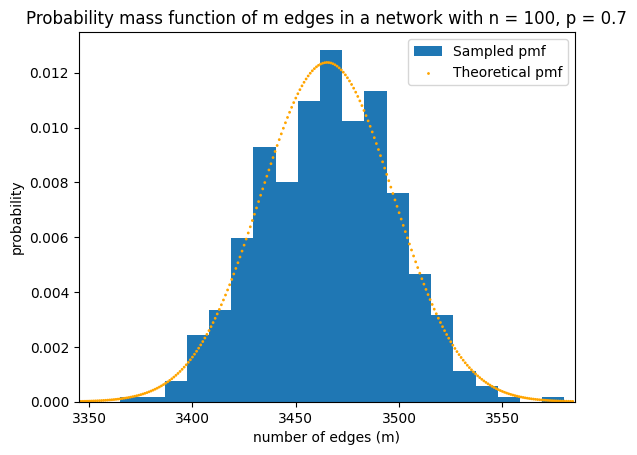

Theoretical Mean: 4455.0 Actual Mean: 4454.912
Theoretical Variance: 445.4999999999999 Actual Variance: 414.88825599999996


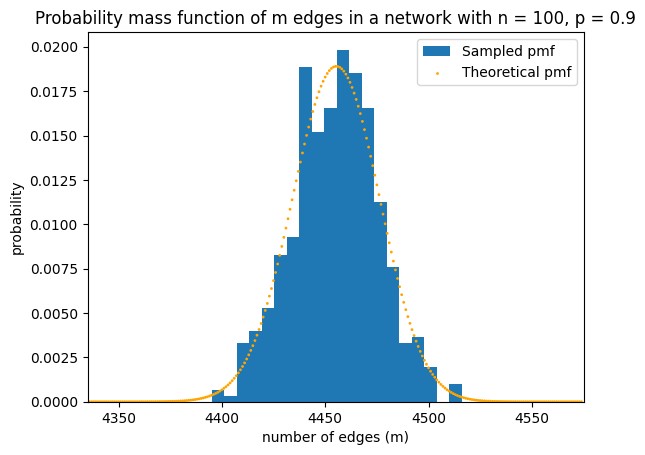

In [36]:
n = 100
p_list = [0.1, 0.3, 0.5, 0.7, 0.9]
sample_size = 500

for p in p_list:
    m_list = []

    for i in range(sample_size):
        bernoulli = Naive_Bernoulli_Network(n, p)
        m = len(bernoulli.edge_list())
        m_list.append(m)

    counts, bins, hist = plt.hist(m_list, density=True, bins=20, label="Sampled pmf")
    theoretical_mean = math.comb(n, 2)*p
    print("Theoretical Mean:", theoretical_mean, "Actual Mean:", np.mean(m_list))
    print("Theoretical Variance:", math.comb(n, 2)*p*(1-p), "Actual Variance:", np.var(m_list))

    left, right = theoretical_mean - 120, theoretical_mean + 120

    m_list = np.arange(left, right, 1)
    density_list = scipy.stats.binom.pmf(m_list, math.comb(n, 2), p)

    plt.scatter(m_list, density_list, np.full((len(m_list),), 1), color="orange", label="Theoretical pmf")
    plt.title(f"Probability mass function of m edges in a network with n = {n}, p = {p}")
    plt.legend()
    plt.xlim(left, right)
    plt.xlabel("number of edges (m)")
    plt.ylabel("probability")
    plt.show()

Q4

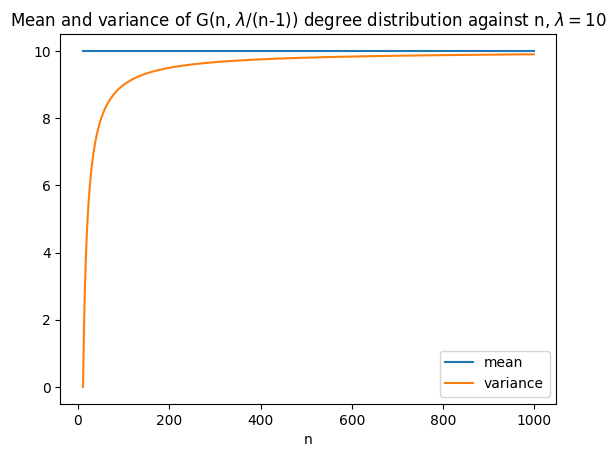

In [7]:
n_list = np.arange(11, 1000, 1)
lambda_const = 10
mean = np.full((len(n_list)), lambda_const)
variance = lambda n: lambda_const * (1 - lambda_const / (n - 1))

plt.plot(n_list, mean, label="mean")
plt.plot(n_list, variance(n_list), label="variance")
plt.xlabel("n")
plt.legend()
plt.title("Mean and variance of G(n, $\lambda$/(n-1)) degree distribution against n, $\lambda = 10$")
plt.show()


Q6

In [13]:
n_list = 2**np.array(range(6, 11))
p = lambda x: 10 / (x - 1)
timer_number = 50

bernoulli_time_list = []
two_step_bernoulli_time_list = []

for n in n_list:
    bernoulli = timeit.timeit(lambda: Naive_Bernoulli_Network(n, p(n)), number=timer_number)
    two_step_bernoulli = timeit.timeit(lambda: Two_Step_Bernoulli_Network(n, p(n)), number=timer_number)

    bernoulli_time_list.append(bernoulli)
    two_step_bernoulli_time_list.append(two_step_bernoulli)

    print(f"n = {n}")
    print(f"Bernoulli: {bernoulli}")
    print(f"Two-step Bernoulli: {two_step_bernoulli}")
    print("")


n = 64
Bernoulli: 0.10245450000002165
Two-step Bernoulli: 0.09688739999910467

n = 128
Bernoulli: 0.37272029999803635
Two-step Bernoulli: 0.1935585000028368

n = 256
Bernoulli: 1.5475265999994008
Two-step Bernoulli: 0.3994295000011334

n = 512
Bernoulli: 5.88601270000072
Two-step Bernoulli: 0.8437659999981406

n = 1024
Bernoulli: 28.916494900000544
Two-step Bernoulli: 2.143624100001034



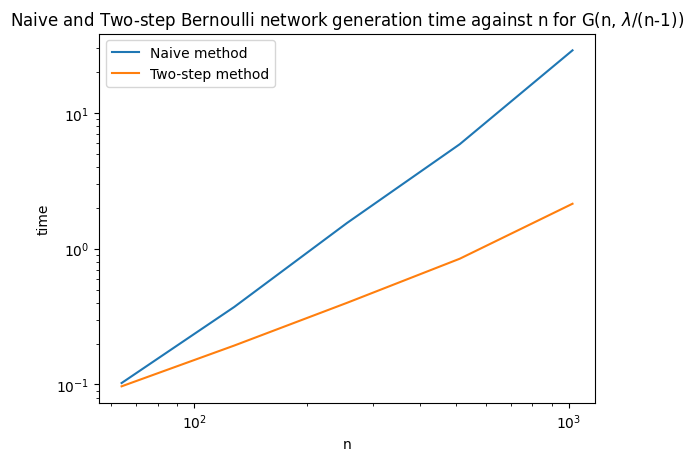

In [14]:
plt.loglog(n_list, bernoulli_time_list, label="Naive method")
plt.loglog(n_list, two_step_bernoulli_time_list, label="Two-step method")
plt.legend()
plt.title("Naive and Two-step Bernoulli network generation time against n for G(n, $\lambda$/(n-1))")
plt.xlabel("n")
plt.ylabel("time")
plt.show()

Q7

In [10]:
n = 4096
p_list =  np.linspace(0, 0.001, 40)
sample_size = 40
size_list = []

def num_reachable_node(node, network: Network):
    queue = deque([node])
    reachable_nodes = set([node])
    
    while queue: # bfs search
        curr_node = queue.popleft()
        reachable_nodes.add(curr_node)
        queue += network.neighbors(curr_node) - reachable_nodes
    
    return len(reachable_nodes) - 1
    
for p in p_list:
    total = 0
    for _ in range(sample_size):
        network = Two_Step_Bernoulli_Network(n, p)
        total += num_reachable_node(1, network)
    size_list.append(total / sample_size)

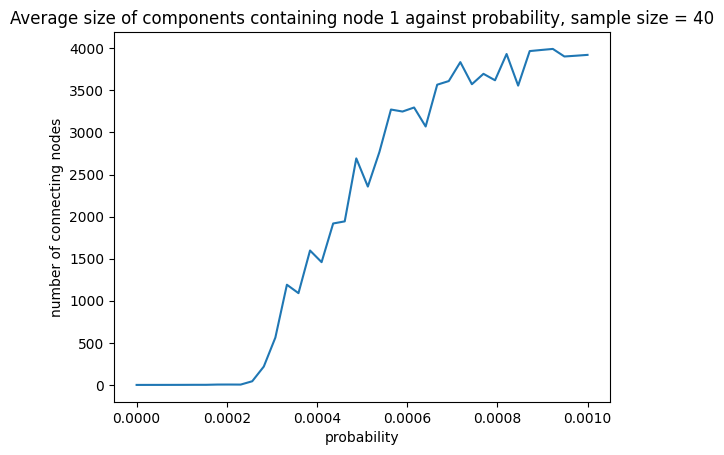

In [11]:
plt.plot(p_list, size_list)
plt.title(f"Average size of components containing node 1 against probability, sample size = {sample_size}")
plt.xlabel("probability")
plt.ylabel("number of connecting nodes")
plt.show()

In [25]:
n = 4096
p_list =  np.linspace(0, 0.001, 20)
sample_size = 100
size_list = []

def num_reachable_node(node, network: Network):
    queue = deque([node])
    reachable_nodes = set([node])
    
    while queue: # bfs search
        curr_node = queue.popleft()
        reachable_nodes.add(curr_node)
        queue += network.neighbors(curr_node) - reachable_nodes
    
    return len(reachable_nodes) - 1
    
for p in p_list:
    total = 0
    for _ in range(sample_size):
        network = Two_Step_Bernoulli_Network(n, p)
        total += num_reachable_node(1, network)
    size_list.append(total / sample_size)

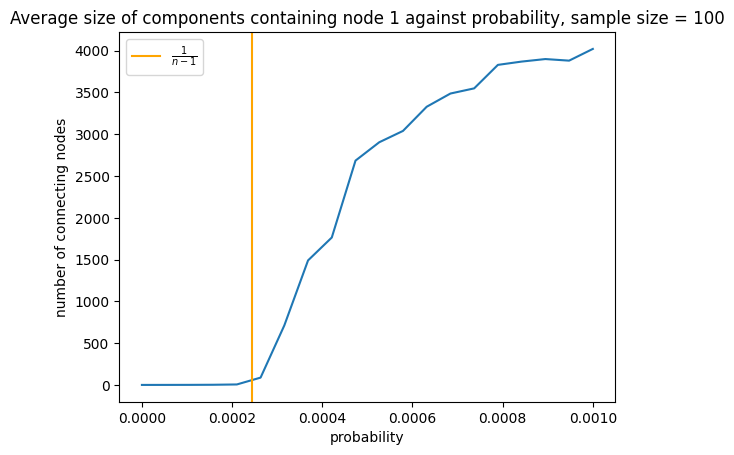

In [26]:
plt.plot(p_list, size_list)
plt.axvline(1 / (n - 1), color="orange", label=r'$\frac{1}{n-1}$')
plt.title(f"Average size of components containing node 1 against probability, sample size = {sample_size}")
plt.legend()
plt.xlabel("probability")
plt.ylabel("number of connecting nodes")
plt.show()

In [22]:
n = 4096
p_list =  np.linspace(0, 0.001, 200)
size_list = []

for p in p_list:
    network = Two_Step_Bernoulli_Network(n, p)
    size_list.append(num_reachable_node(1, network))

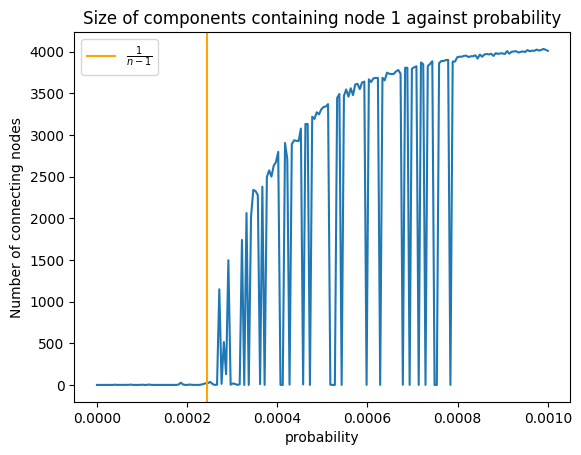

In [23]:
plt.plot(p_list, size_list)
plt.title(f"Size of components containing node 1 against probability")
plt.axvline(1 / (n - 1), color="orange", label=r'$\frac{1}{n-1}$')
plt.xlabel("probability")
plt.ylabel("Number of connecting nodes")
plt.legend()
plt.show()